<a href="https://colab.research.google.com/github/smfs18/projeto-estatistica/blob/main/AnaliseBivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações

In [ ]:
library(ggplot2)

In [ ]:
csv_url <- "https://raw.githubusercontent.com/smfs18/projeto-estatistica/refs/heads/main/dados_tratados.csv"
df = read.csv(csv_url)

head(df)

,ID_Paciente,Idade,Sexo,Peso_kg,Altura_cm,Fumante,Nivel_Atividade,Horas_Sono,Pressao_Sistolica,Pressao_Diastolica,Historico_Doenca,Consumo_Alcool_semanal_ml,Data_Exame
,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>
1,1,45,F,74.07,172.26,Sim,Sedentário,5.1,106,78,Não,134.93,05/04/2024
2,2,55,M,70.72,181.97,Não,Baixo,4.0,135,76,Não,440.33,22/04/2024
3,3,61,F,57.41,171.51,Não,Alto,4.3,112,99,Sim,56.91,21/03/2024
4,4,43,M,75.72,191.34,Não,Moderado,9.2,133,73,Sim,86.24,04/02/2024
5,5,60,M,53.16,171.56,Não,Moderado,6.7,134,79,Não,5.32,25/10/2024
6,6,65,F,88.87,171.91,Sim,Baixo,5.0,110,95,Não Informado,101.58,11/02/2023


# Análises

## Peso vs Altura (Numérica vs Numérica)

In [ ]:
# Calcular a correlação
correlation <- cor(df$Peso_kg, df$Altura_cm)
print("Correlação entre altura e peso:")
print(correlation)

[1] "Correlação entre altura e peso:"
[1] -0.00294464


O cálculo de correlação mostra que não existe uma correlação entre o peso e a altura dos pacientes do dataset. O coeficiente de correlação é muito próximo de zero, o que indica que a altura não é um bom preditor do peso. Isso sugere que o peso é influenciado por outros fatores além da altura.

## Pressão Sistólica vs Pressão Diastólica (Numérica vs Numérica)

In [ ]:
correlation <- cor(df$Pressao_Sistolica, df$Pressao_Diastolica)
print("Correlação entre idade e consumo de álcool:")
print(correlation)

[1] "Correlação entre idade e consumo de álcool:"
[1] 0.05986407


O cálculo de correlação mostra que existe uma correlação entre a pressão sistólica e a pressão diastólica. Apesar do coeficiente de correlação ser um pouco baixo, ele ainda assim, indica que a pressão sistólica é um preditor da pressão diastólica.

## Peso vs Nível de Atividade (Numérica vs Categórica)

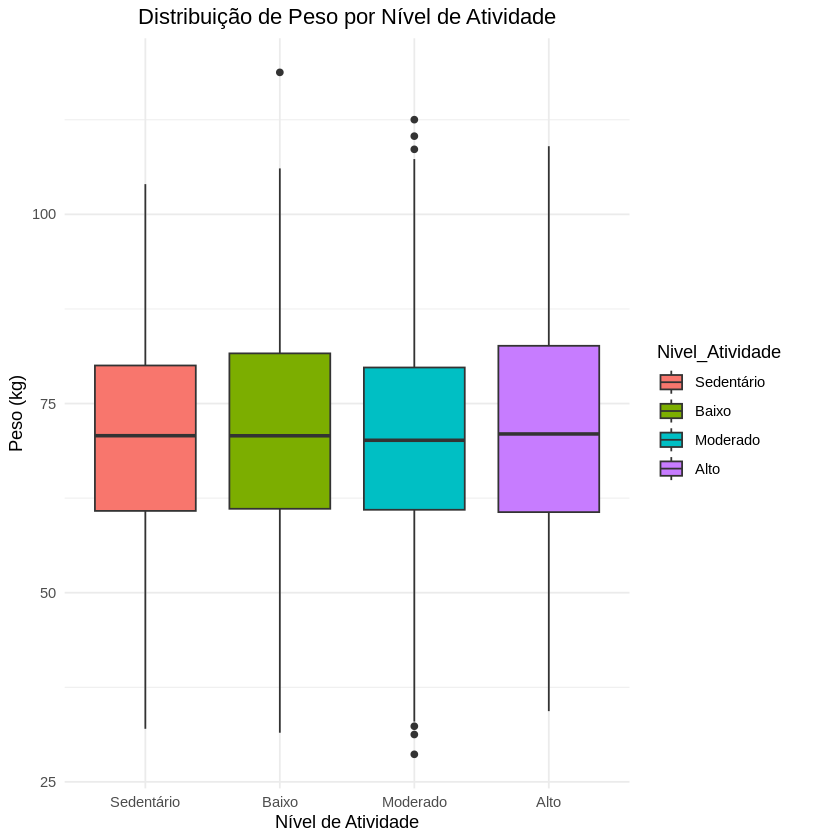

In [ ]:
df$Nivel_Atividade <- factor(df$Nivel_Atividade, levels = c("Sedentário", "Baixo", "Moderado", "Alto"))

ggplot(df, aes(x = Nivel_Atividade, y = Peso_kg, fill = Nivel_Atividade)) +
  geom_boxplot() +
  labs(
    title = "Distribuição de Peso por Nível de Atividade",
    x = "Nível de Atividade",
    y = "Peso (kg)" ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

O gráfico revela que os pacientes com nível de atividade sedentário tendem a apresentar um peso ligeiramente superior em comparação com os outros grupos. A mediana do peso para o grupo sedentário é a mais alta de todos. Por outro lado, os grupos baixo, moderado e alto têm medianas de peso muito semelhantes e ligeiramente inferiores, sugerindo que a prática de qualquer nível de atividade física pode estar associada a um controle de peso um pouco melhor em comparação com um estilo de vida sedentário. É possível também ver que o grupo moderado é o que possui mais pessoas com pesos extremos.

## Fumante vs Histórico de Doença (Categórica vs Categórica)

In [ ]:
contingency_table <- table(df$Fumante, df$Historico_Doenca)
print("Tabela de Contingência: Fumante vs Histórico de Doença")
print(contingency_table)

[1] "Tabela de Contingência: Fumante vs Histórico de Doença"
               
                Não Não Informado Sim
  Não           462            54 173
  Não informado  62             9  22
  Sim           150            12  56


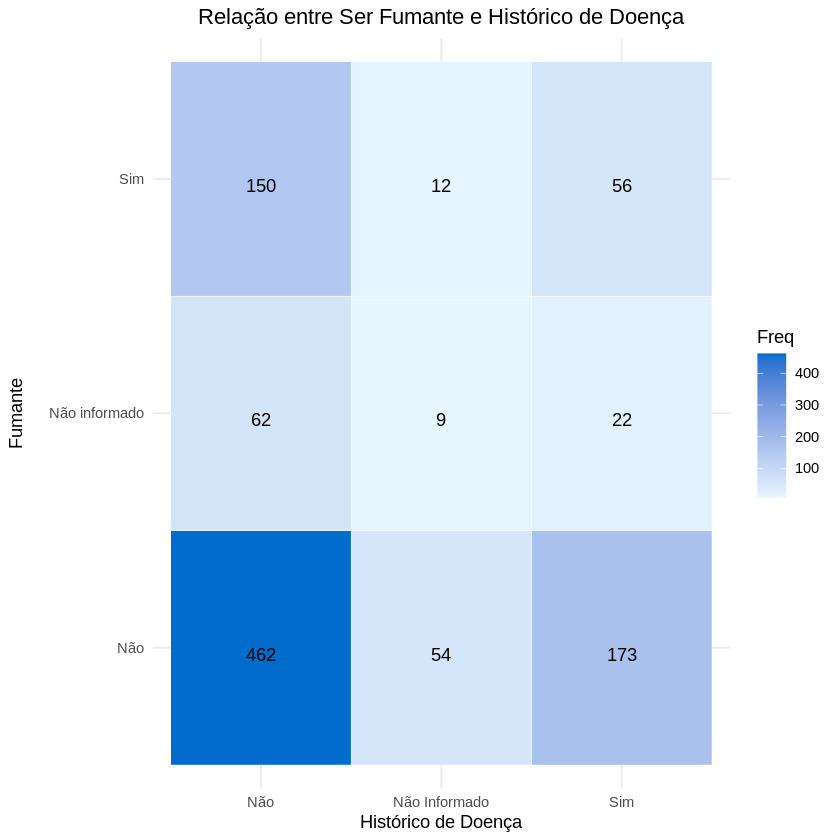

In [ ]:
contingency_df <- as.data.frame(contingency_table)
names(contingency_df) <- c("Fumante", "Historico_Doenca", "Freq")

ggplot(contingency_df, aes(x = Historico_Doenca, y = Fumante, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "#e6f5ff", high = "#006dcc") +
  labs(
    title = "Relação entre Ser Fumante e Histórico de Doença",
    x = "Histórico de Doença",
    y = "Fumante"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

O heat map e a tabela de contingência indica que a maioria dos pacientes, tanto fumantes quanto não fumantes, não possui histórico de doenças. No grupo de não fumantes, temos 462 sem histórico e 173 com histórico. No grupo de fumantes, temos 150 sem histórico e 56 com histórico. Isso indica que existe uma relação entre ser fumante e ter um historico de doença